In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('DataSet/TelcoCustomerChurn.csv')

# 1. 자료 정리
- 전처리가 필요한 부분?
 - Missing values
 - categorical data

In [3]:
data.info()
# gender : gender info
# SeniorCitizen : senior or not
# Partner whether the partner has partner or not
# dependents :
# tenure : company span

# Contract : period 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Missing data is zero

In [4]:
#missing_index = data.isna().any(axis=1)
missing_count = data.isna().any(axis=1).sum()
#print(data[missing_index])
print("missing_count : ",missing_count)

missing_count :  0


In [5]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
#Labeling

category_label = ["SeniorCitizen",
                                 "Partner",
                                "Dependents",
                                "Contract",
                                "PaperlessBilling",
                                "PaymentMethod",
                                "PhoneService",
                                "MultipleLines",
                                "InternetService",
                                "OnlineSecurity",
                                "OnlineBackup",
                                "DeviceProtection",
                                "TechSupport",
                                "StreamingTV",
                                "StreamingMovies",
                  "gender",
                  "Churn"]


continuous_label = ["tenure", "MonthlyCharges","TotalCharges"]

In [7]:
#data['TotalCharges']=data.TotalCharges.astype(float)
try:
    data['tenure']=pd.to_numeric(data['tenure'])
    data['MonthlyCharges']=pd.to_numeric(data['MonthlyCharges'])
    data['TotalCharges']=pd.to_numeric(data['TotalCharges'])
except Exception as e:
    print (e)

Unable to parse string " " at position 488


In [8]:
index_temp = data['TotalCharges']==" " 
indexSet = [i for i,x in enumerate(index_temp) if x]
data=data.drop(index=indexSet,axis=0)
#data=data.drop(753,axis=0)
#data=data.drop(751,axis=0)
#data=data.drop(750,axis=0)
#data=data.drop(936,axis=0)

In [9]:
data.reset_index(drop=True,inplace=True)
#data['TotalCharges'][740:750]

In [10]:
##data['TotalCharges'][488]
#index_temp = data['TotalCharges']==" "
#print(index_temp.sum())
data['TotalCharges']=pd.to_numeric(data['TotalCharges'])

In [11]:
#data['TotalCharges'][752]

In [12]:
#print(data_numerical)
#print(data_categorical)
len(category_label)

17

# 2. Summary Stats

 1. 정량변수와 정성변수. 개별 특징
 2. 상관관계 분석 후 주의점..?

In [13]:
# Categorical data
#fix, ax = plt.subplots()

#copy data
data_copy = data.copy()

# Divide data
#data_id = data_copy.pop("customerID")
#data_categorical = data_copy[category_string]
#data_copy = data_copy.drop(category_string, axis=1)
#data_numerical = data_copy

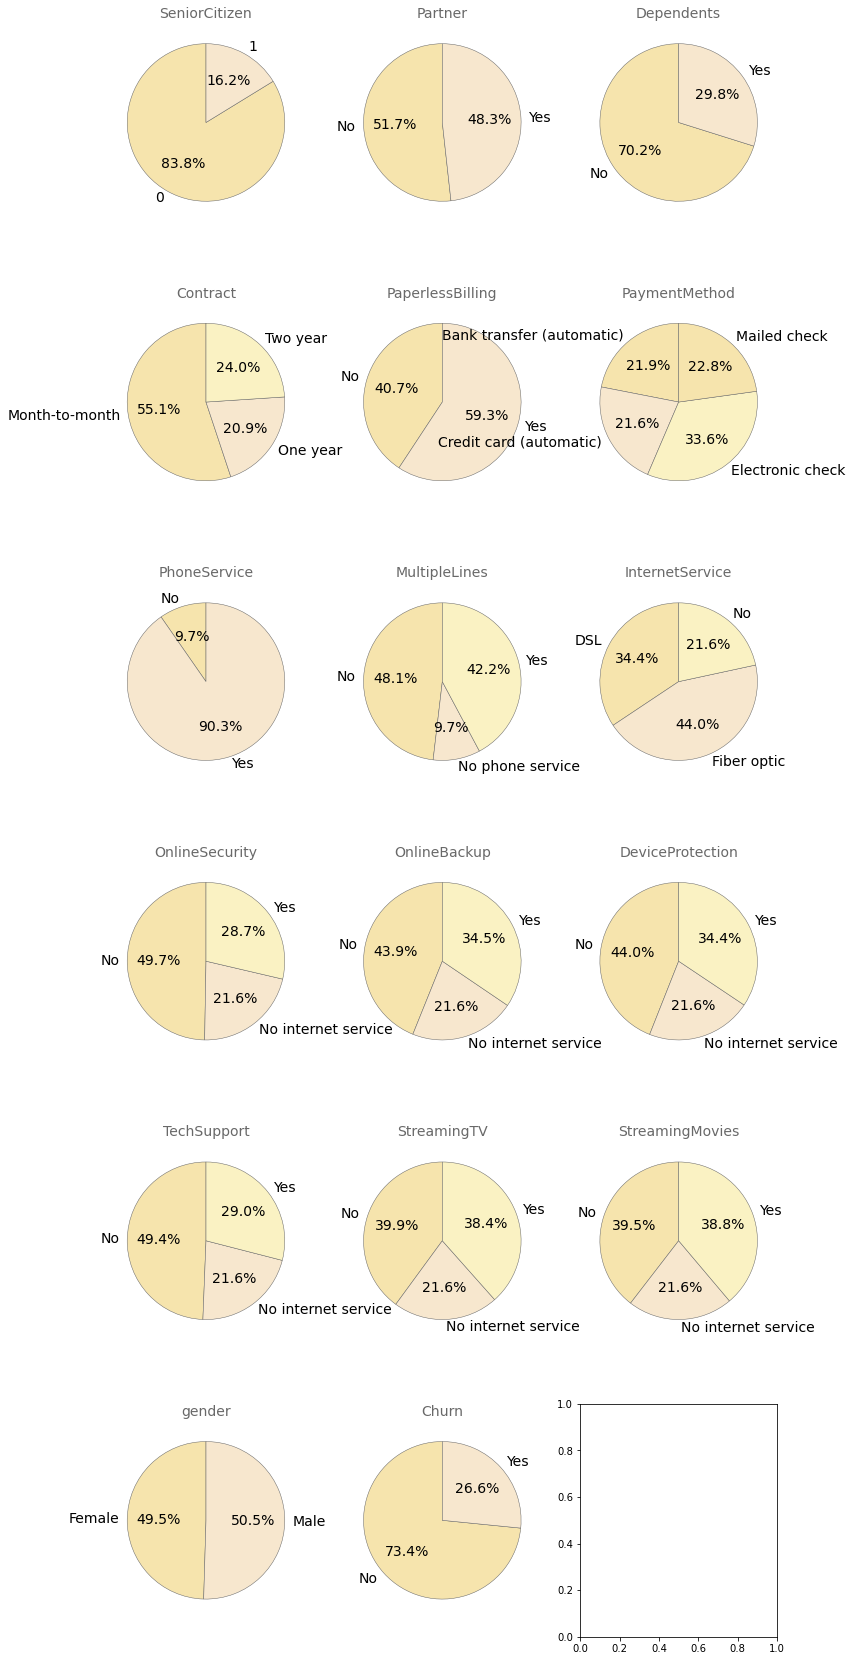

In [14]:
#labels = [["first class", "second class", "third class"],
#          ["male","female"],
#          ["Southampton","Cherbourg","Queenstown"]]

labels = [[""]]

colors = ["#F6E4AD","#f7e7ce","#FAF2C3"]

fig, ax = plt.subplots(6,3, figsize = (12,30))
ax = ax.flatten()

for i, var in enumerate(category_label):
    unique, counts = np.unique(data_copy.loc[:,var], return_counts=True)
    ax[i].pie(counts, colors = colors, labels=unique,autopct = '%.1f%%',
             startangle = 90, textprops = {'fontsize':14},
             wedgeprops = {"edgecolor":"dimgray",'linewidth':.5})
    ax[i].set_title(var,fontsize=14,color = 'dimgray')
    

#family = (x.sibsp + x.parch + 1).value_counts(normalize=False).sort_index()
#family.plot(kind="bar",ax=ax[3], color = "#F6E4AD", edgecolor="dimgray")
#ax[3].set_title("family size", fontsize=16, color="dimgray")
#ax[3].grid(axis="y")
#ax[3].set_ylim([0,1000])

#for c in ax[3].containers:
#    ax[3].bar_label(c,fmt='%.0f',padding=4, fontsize=11)
    
#x.age.plot(kind="kde",ax=ax[-2], color="dimgrey",bw_method=0.2)
#ax[-2].set_xlim(0,100)
#ax[-2].text(0.35, 0.8, f"max value:{x.age.max():.0f}",
#           fontsize=14,color="dimgray",transform=ax[-2].transAxes)
#
#ax[-2].grid(axis="y")
#ax[-2].set_title("age",fontsize=16,color="dimgray")

#x.fare.plot(kind="kde", ax=ax[-1], color="dimgrey", bw_method=0.08)#
#ax[-1].set_xlim(0,100)
#ax[-1].text(0.25, 0.8, f"max value:{x.fare.max():.2f}",
#           fontsize=14, color="dimgray", transform=ax[-1].transAxes)
#ax[-1].grid(axis="y")
#ax[-1].set_title("fare",fontsize=16,color="dimgray")

#plt.suptitle(f"Figure 1. Demographics of the Titanic Passengers\n\
#Percent Survived: {100*y.astype(int).sum()/len(y):.2f}%",fontsize=18)
#plt.tight_layout();

In [15]:
## Preprocess of Data


# Dummy process
#data_categorical = pd.get_dummies(data_categorical,drop_first = True)
data_dummied = pd.get_dummies(data_copy, columns=category_label, drop_first=True)
#print(data_1)


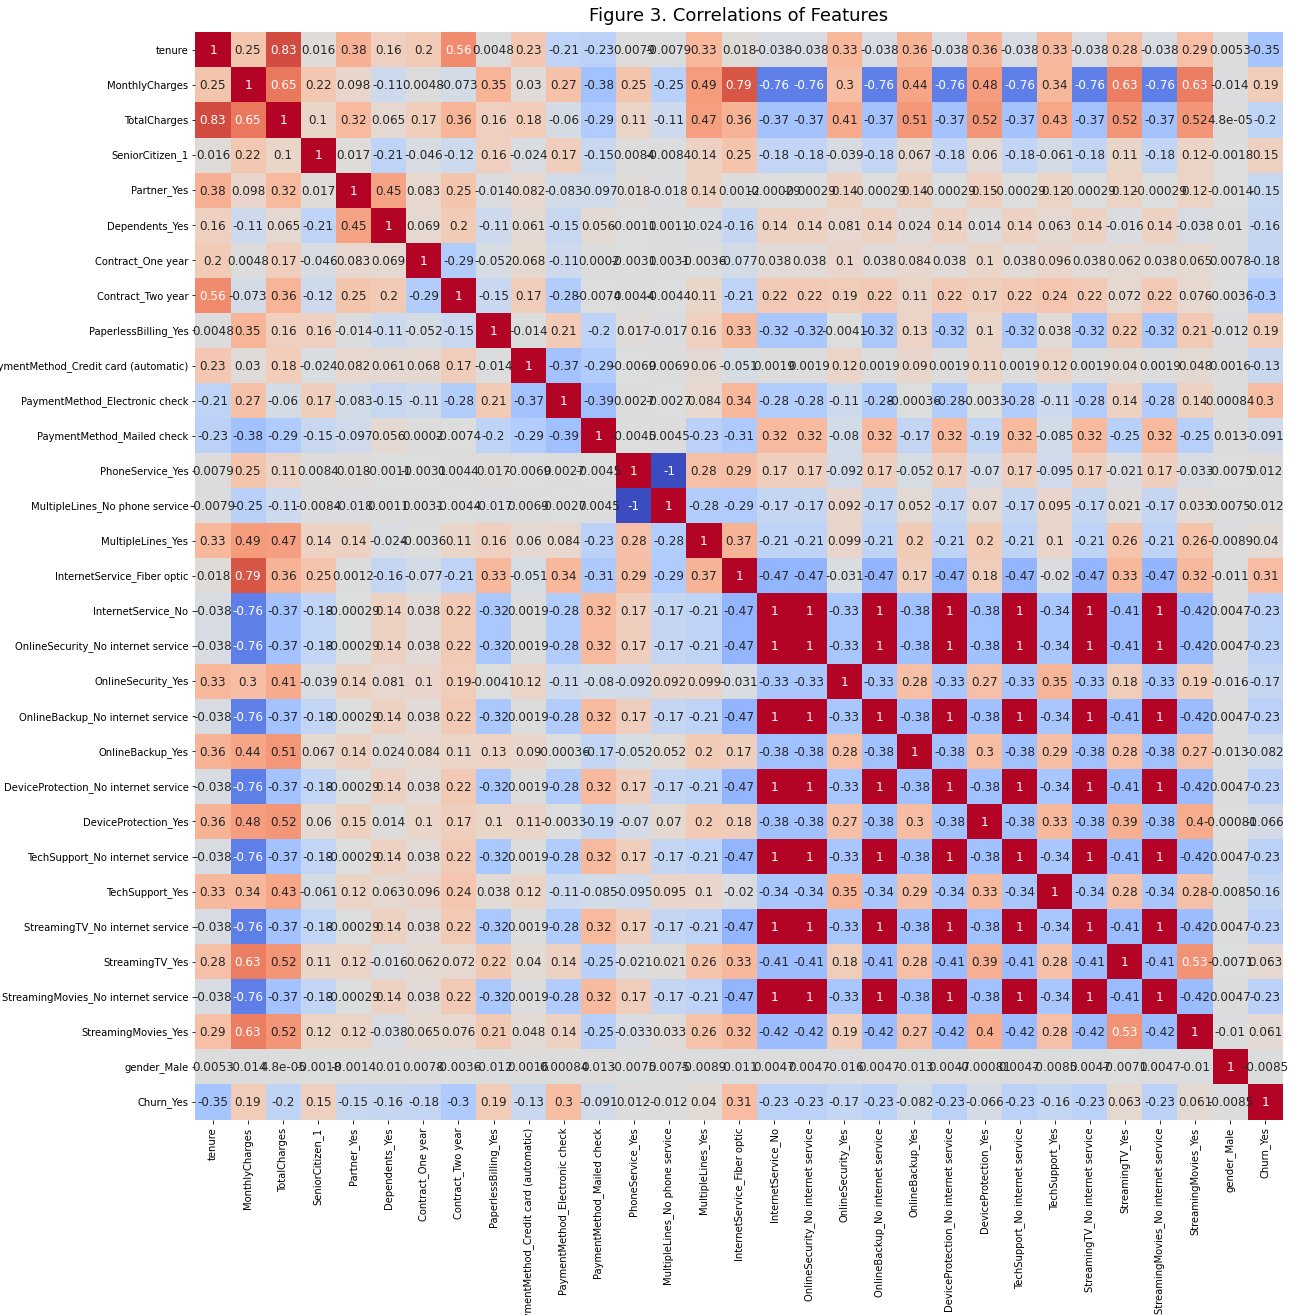

In [16]:
import seaborn as sns

plt.figure(figsize=(20,20))
plt.yticks(rotation=0)
sns.set(font_scale=1)
heatmap = sns.heatmap(data_dummied.corr(),vmin=-1,vmax=1,annot=True,square=True,cmap='coolwarm',cbar=False)
heatmap.set_title('Figure 3. Correlations of Features', fontdict={'fontsize':18},pad=12)
sns.reset_orig()

array([[<AxesSubplot:xlabel='tenure', ylabel='tenure'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>],
       [<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='MonthlyCharges'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>],
       [<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>,
        <AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>,
        <AxesSubplot:xlabel='TotalCharges', ylabel='TotalCharges'>]],
      dtype=object)

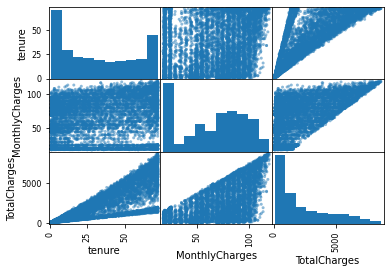

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_dummied[continuous_label],alpha=0.5)

In [18]:
data_dummied.info()
#data_dummied = data_dummied.drop([])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   SeniorCitizen_1                        7032 non-null   uint8  
 5   Partner_Yes                            7032 non-null   uint8  
 6   Dependents_Yes                         7032 non-null   uint8  
 7   Contract_One year                      7032 non-null   uint8  
 8   Contract_Two year                      7032 non-null   uint8  
 9   PaperlessBilling_Yes                   7032 non-null   uint8  
 10  PaymentMethod_Credit card (automatic)  7032 non-null   uint8  
 11  Paym

### 상관관계에 대한 분석

![n1](image/Correlation.png)

# 3. Variation Inflation Factor

- 사용할 변수 정리

In [19]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(features):
    features=sm.add_constant(features)
    features.dropna(inplace=True)
    
    vif = pd.DataFrame([variance_inflation_factor(features.values, i)
                       for i in range(features.shape[1])],columns=['VIF'])
    vif.index = features.columns
    return vif


#vif(data_dummied)

#data_dummied.values
#data_dummied.values

data_id = data_dummied.pop("customerID")
vif_return=vif(data_dummied)
#atddddata_dummied
#x_log.drop('fare',axis=1,inplace=True)
#x_log = x_log[['age','sibsp','parch','log_fare','pclass_2','pclass_3','sex_male',
#               'embarked_Q','embarked_S']]

#VIF = pd.concat([vif(x),vif(x_log)],axis=1)
#VIF = VIF.loc[['const','age','sibsp','parch','fare','log_fare',
#              'pclass_2','pclass_3','sex_male',
#              'embarked_Q','embarked_S'],:]
#VIF.columns = ['vif fare','vif log_fare']
#VIF


/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/statsmodels-0.13.1-py3.9-macosx-11.5-x86_64.egg/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/statsmodels-0.13.1-py3.9-macosx-11.5-x86_64.egg/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [20]:
print(vif_return)
#vif_drop=[print(str1,i) for i, str1 in enumerate(vif_return.index) if vif_return[i]>10]
vif_drop=[print(str1,i) for i, str1 in enumerate(vif_return.index)]

                                              VIF
const                                    0.000000
tenure                                   7.601061
MonthlyCharges                         866.100958
TotalCharges                            10.883913
SeniorCitizen_1                          1.155144
Partner_Yes                              1.462989
Dependents_Yes                           1.382213
Contract_One year                        1.639004
Contract_Two year                        2.658720
PaperlessBilling_Yes                     1.211939
PaymentMethod_Credit card (automatic)    1.561044
PaymentMethod_Electronic check           1.983325
PaymentMethod_Mailed check               1.857116
PhoneService_Yes                              inf
MultipleLines_No phone service                inf
MultipleLines_Yes                        7.295768
InternetService_Fiber optic            148.578927
InternetService_No                            inf
OnlineSecurity_No internet service            inf


In [21]:
vif_drop=[str1 for i, str1 in enumerate(vif_return.index) if vif_return['VIF'][i]>10]

In [22]:
print("Drop List : ",vif_drop)

data_dummied_copy=data_dummied.copy()
for str in vif_drop:
    data_dummied_copy.pop(str)
    
print(data_dummied_copy)

Drop List :  ['MonthlyCharges', 'TotalCharges', 'PhoneService_Yes', 'MultipleLines_No phone service', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes']
      tenure  SeniorCitizen_1  Partner_Yes  Dependents_Yes  Contract_One year  \
0          1                0            1               0                  0   
1         34                0            0               0                  1   
2          2                0            0               0                  0   
3         45                0            0               0                  1   
4          2                0            0               0                  0   
...      ...              ...          ...             ...                ...   
7027      24 

In [23]:
data_dummied_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   tenure                                 7032 non-null   int64
 1   SeniorCitizen_1                        7032 non-null   uint8
 2   Partner_Yes                            7032 non-null   uint8
 3   Dependents_Yes                         7032 non-null   uint8
 4   Contract_One year                      7032 non-null   uint8
 5   Contract_Two year                      7032 non-null   uint8
 6   PaperlessBilling_Yes                   7032 non-null   uint8
 7   PaymentMethod_Credit card (automatic)  7032 non-null   uint8
 8   PaymentMethod_Electronic check         7032 non-null   uint8
 9   PaymentMethod_Mailed check             7032 non-null   uint8
 10  MultipleLines_Yes                      7032 non-null   uint8
 11  OnlineSecurity_Yes            

# Logistic Regression & Feature selection

In [24]:
#from sklearn.model_selection import train_test_selection
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
#data_dummied_copy
#Split data
X= sm.add_constant(data_dummied_copy)# Add Constant
y= X.pop("Churn_Yes")
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)


In [25]:
#Logistic
logit = sm.Logit(y_train,X_train).fit()
#logit = logit.fit_regularized()

#logit = Logistic

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/statsmodels-0.13.1-py3.9-macosx-11.5-x86_64.egg/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/statsmodels-0.13.1-py3.9-macosx-11.5-x86_64.egg/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [26]:
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 4219
Model:                          Logit   Df Residuals:                     4202
Method:                           MLE   Df Model:                           16
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                     inf
Time:                        04:51:34   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3920      0.140     -2.805      0.005      -0.666      -0.118
tenure                                   -0.0306  

/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/statsmodels-0.13.1-py3.9-macosx-11.5-x86_64.egg/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/statsmodels-0.13.1-py3.9-macosx-11.5-x86_64.egg/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
cv=16

# SCORE
#scoring ='neg_log_loss'
#scoring ='precision'
scoring ='f1'

C=np.logspace(-4,5,20)

# SOLVER
solver = ['liblinear','saga']
#solver = ['liblinear']
param_grid =[{"C":C,"solver":solver}]

gs=GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=cv,
                scoring=scoring,return_train_score=True)

gs.fit(X_train,y_train)

/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Ca

/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Ca

/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Ca

/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Ca

/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Ca

/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Ca

/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Ca

/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Ca

/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Ca

/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Carnets-sci.app/Library/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/private/var/containers/Bundle/Application/3D6621E6-8732-4C2A-A125-F5B2948C9BB0/Ca

GridSearchCV(cv=16, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.97635144e-04, 8.85866790e-04, 2.63665090e-03,
       7.84759970e-03, 2.33572147e-02, 6.95192796e-02, 2.06913808e-01,
       6.15848211e-01, 1.83298071e+00, 5.45559478e+00, 1.62377674e+01,
       4.83293024e+01, 1.43844989e+02, 4.28133240e+02, 1.27427499e+03,
       3.79269019e+03, 1.12883789e+04, 3.35981829e+04, 1.00000000e+05]),
                          'solver': ['liblinear', 'saga']}],
             return_train_score=True, scoring='f1')

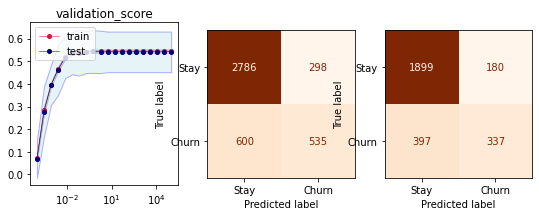

In [28]:
res = pd.DataFrame.from_dict(gs.cv_results_)

fig, ax = plt.subplots(1,3,figsize=(9,3))

#training data with liblinear?
train_mean = res[res.param_solver=='liblinear']['mean_train_score']
train_std = res[res.param_solver=='liblinear']['std_train_score']

ax[0].plot(C,train_mean,'o-',label='train',color='crimson',lw=.5,
          markersize=4)
ax[0].fill_between(C, train_mean-1.96*train_std,train_mean+1.96*train_std,
                  color="lightgray", edgecolor="dimgray",alpha=.5,lw=1)


#test data
test_mean = res[res.param_solver=='liblinear']['mean_test_score']
test_std = res[res.param_solver=='liblinear']['std_test_score']

ax[0].plot(C,test_mean,'o-',label='test',color='navy',lw=.5,
          markersize=4)
ax[0].fill_between(C, test_mean-1.96*test_std,test_mean+1.96*test_std,
                  color="lightblue", edgecolor="blue",alpha=.3,lw=1)


ax[0].set_xscale('log')
#ax[0].set_ylim()
ax[0].legend(loc='upper left')
ax[0].set_title('validation_score',fontsize=12)


ConfusionMatrixDisplay.from_predictions(y_train,gs.predict(X_train),
                                       colorbar=False, ax=ax[1],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])

ConfusionMatrixDisplay.from_predictions(y_test,gs.predict(X_test),
                                       colorbar=False, ax=ax[2],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])




# Naive Bayes Classification
- score?

In [29]:
#from sklearn.model_selection import train_test_selection
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
#data_dummied_copy
#Split data
X= sm.add_constant(data_dummied_copy)# Add Constant
y= X.pop("tenure")
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)


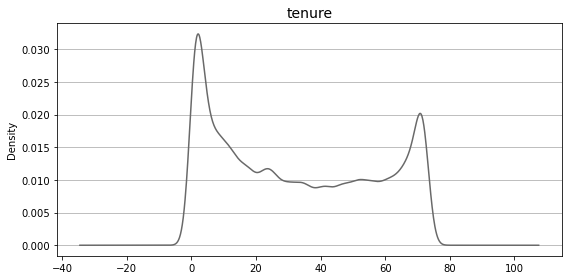

In [35]:
fig, ax = plt.subplots(1,1,figsize=(8,4))

y.plot(kind="kde",ax=ax,color="dimgrey",bw_method=0.08)
#ax[0].set_xlim(-10,300)
ax.grid(axis="y")
ax.set_title("tenure",fontsize=14)

#y.plot(kind="kde",ax=ax[1],color="dimgrey",bw_method=0.08)
#ax[1].set_xscale('log')
#ax[1].grid(axis="y")
#ax[1].set_title("fare in log scale", fontsize=14)

fig.tight_layout()

In [ ]:
stop

In [36]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

num_of_folds=10

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False)

num_fold = 0
roc_auc_list = []
roc_auc_score_list=[]
predictions_probas_list=np.zeros([len(y_test),2])

for train_index, valid_index in folds.split(X_train,y_train):
    xtrain_stra, xvalid_stra = X_train.iloc[train_index,:], X_train.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = y_train.iloc[train_index], y_train.iloc[valid_index]
    
    print("Stratified Fold : ",num_fold)
    num_fold=num_fold+1
    
    
    #clf_stra_bayes=CategoricalNB()
    #CNB = CategoricalNB()
    #CNB.fit(xtrain_stra, ytrain_stra)
    #predictions = CNB.predict(X_test)
    #predictions_probas = CNB.predict_proba(X_test)
    
    NB = MultinomialNB()
    NB.fit(xtrain_stra, ytrain_stra)
    predictions = NB.predict(X_test)
    predictions_probas = NB.predict_proba(X_test)
    
    predictions_probas_list +=predictions_probas/num_of_folds
    
    roc_auc_list.append(roc_auc_score(y_test, predictions_probas[:,1], average="macro"))
    
#    

roc_auc_score_list.append(roc_auc_list)
predictions=np.argmax(predictions_probas_list,axis=1)
print(classification_report(y_test,predictions))
print("CV f1_score",f1_score(y_test,predictions,average="macro"))


fig, ax =plt.subplots(1,3,figsize=(9,3))
ConfusionMatrixDisplay.from_predictions(y_test,predictions,
                                       colorbar=False, ax=ax[0],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])


Stratified Fold :  0


ValueError: operands could not be broadcast together with shapes (2813,2) (2813,72) (2813,2) 

res = pd.DataFrame.from_dict(gs.cv_results_)

fig, ax = plt.subplots(1,3,figsize=(9,3))

#training data with liblinear?
train_mean = res[res.param_solver=='saga']['mean_train_score']
train_std = res[res.param_solver=='saga']['std_train_score']

ax[0].plot(C,train_mean,'o-',label='train',color='crimson',lw=.5,
          markersize=4)
ax[0].fill_between(C, train_mean-1.96*train_std,train_mean+1.96*train_std,
                  color="lightgray", edgecolor="dimgray",alpha=.5,lw=1)


#test data
test_mean = res[res.param_solver=='saga']['mean_test_score']
test_std = res[res.param_solver=='saga']['std_test_score']

ax[0].plot(C,test_mean,'o-',label='test',color='navy',lw=.5,
          markersize=4)
ax[0].fill_between(C, test_mean-1.96*test_std,test_mean+1.96*test_std,
                  color="lightblue", edgecolor="blue",alpha=.3,lw=1)


ax[0].set_xscale('log')
#ax[0].set_ylim()
ax[0].legend(loc='upper left')
ax[0].set_title('validation_score',fontsize=12)


ConfusionMatrixDisplay.from_predictions(y_train,gs.predict(X_train),
                                       colorbar=False, ax=ax[1],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])

ConfusionMatrixDisplay.from_predictions(y_test,gs.predict(X_test),
                                       colorbar=False, ax=ax[2],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])




from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

num_of_folds=10

folds = StratifiedKFold(n_splits=num_of_folds, shuffle=False)

num_fold = 0
roc_auc_list = []
roc_auc_score_list=[]
predictions_probas_list=np.zeros([len(y_test),2])

for train_index, valid_index in folds.split(X_train,y_train):
    xtrain_stra, xvalid_stra = X_train.iloc[train_index,:], X_train.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = y_train.iloc[train_index], y_train.iloc[valid_index]
    
    print("Stratified Fold : ",num_fold)
    num_fold=num_fold+1
    
    
    #clf_stra_bayes=CategoricalNB()
    #CNB = CategoricalNB()
    #CNB.fit(xtrain_stra, ytrain_stra)
    #predictions = CNB.predict(X_test)
    #predictions_probas = CNB.predict_proba(X_test)
    
    NB = MultinomialNB()
    NB.fit(xtrain_stra, ytrain_stra)
    predictions = NB.predict(X_test)
    predictions_probas = NB.predict_proba(X_test)
    
    predictions_probas_list +=predictions_probas/num_of_folds
    
    roc_auc_list.append(roc_auc_score(y_test, predictions_probas[:,1], average="macro"))
    
#    

roc_auc_score_list.append(roc_auc_list)
predictions=np.argmax(predictions_probas_list,axis=1)
print(classification_report(y_test,predictions))
print("CV f1_score",f1_score(y_test,predictions,average="macro"))


fig, ax =plt.subplots(1,3,figsize=(9,3))
ConfusionMatrixDisplay.from_predictions(y_test,predictions,
                                       colorbar=False, ax=ax[0],cmap=plt.cm.Oranges,
                                       display_labels=['Stay','Churn'])


In [ ]:
predictions_probas_list

In [ ]:
logit.predict(X_train)

In [ ]:
y_train = pd.to_numeric(y_train)

In [ ]:
y_train

In [ ]:
gs.predict()